In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
df=pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
#Data preprocessing not required as it is already in transaction format

In [5]:
# most popular items
count = df.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [6]:
df.shape

(2000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
# calculating purchased and Non Purchased value counts
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

ChildBks
0    1154
1    846 
Name: ChildBks, dtype: int64

YouthBks
0    1505
1    495 
Name: YouthBks, dtype: int64

CookBks
0    1138
1    862 
Name: CookBks, dtype: int64

DoItYBks
0    1436
1    564 
Name: DoItYBks, dtype: int64

RefBks
0    1571
1    429 
Name: RefBks, dtype: int64

ArtBks
0    1518
1    482 
Name: ArtBks, dtype: int64

GeogBks
0    1448
1    552 
Name: GeogBks, dtype: int64

ItalCook
0    1773
1    227 
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1    74  
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1    97  
Name: ItalArt, dtype: int64

Florence
0    1783
1    217 
Name: Florence, dtype: int64



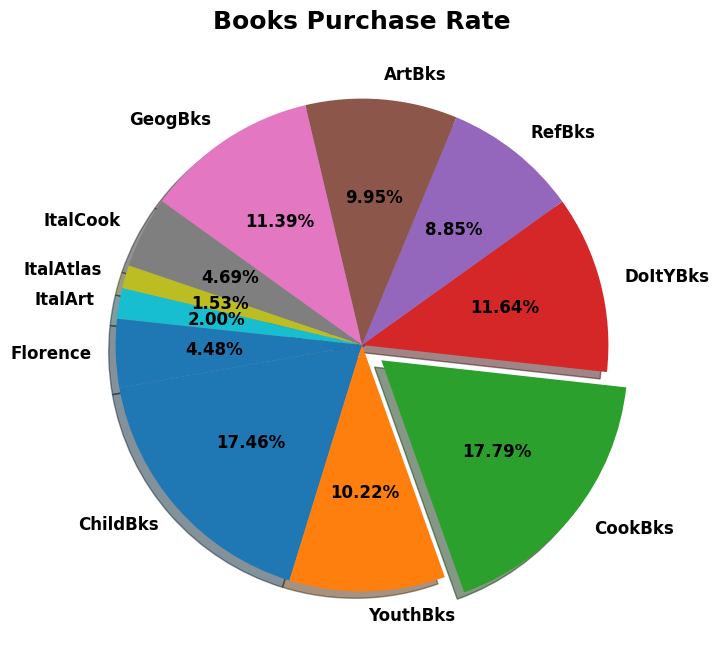

In [9]:
# Data Visualization
#Pie plot for each book and contibution
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.pie(df.sum(),
       labels=df.columns,
       explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

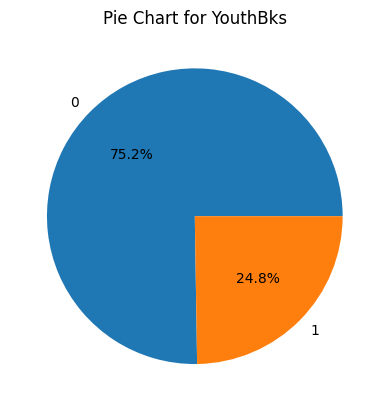

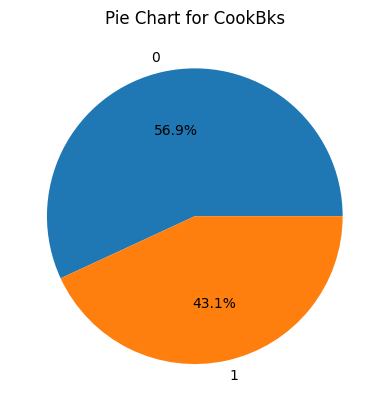

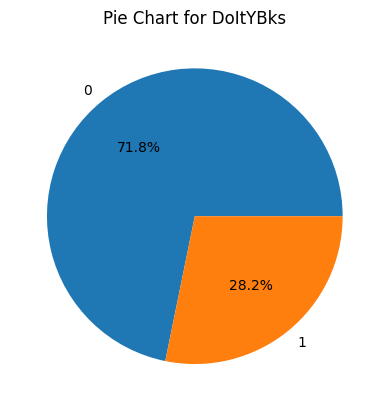

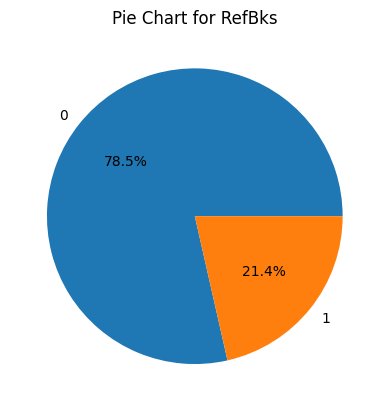

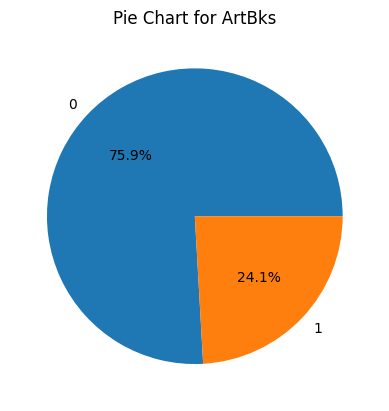

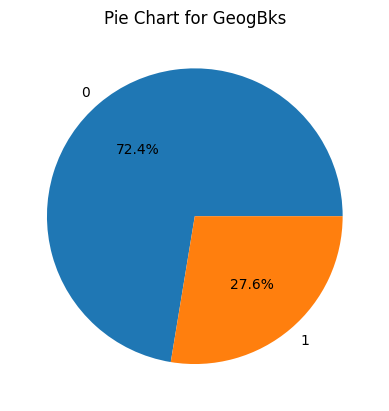

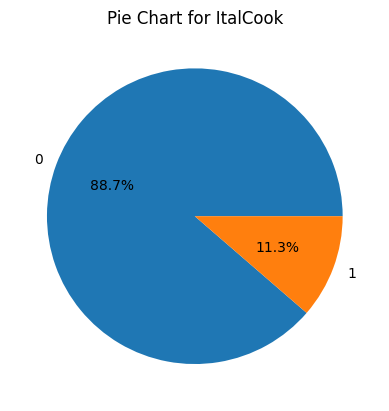

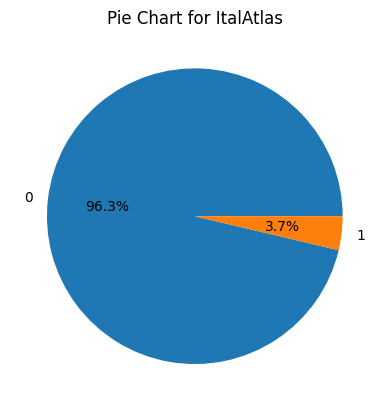

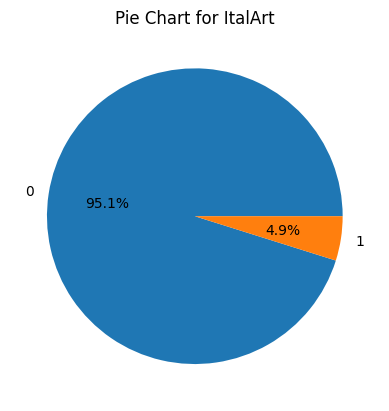

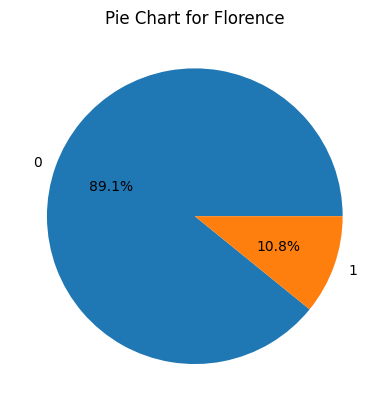

In [10]:
#pie chart individually
# Get all columns except the index column
columns = df.columns[1:]

# Create a pie chart for each column
for col in columns:
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct="%1.1f%%")
  plt.title(f"Pie Chart for {col}")
  plt.show()

In [11]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


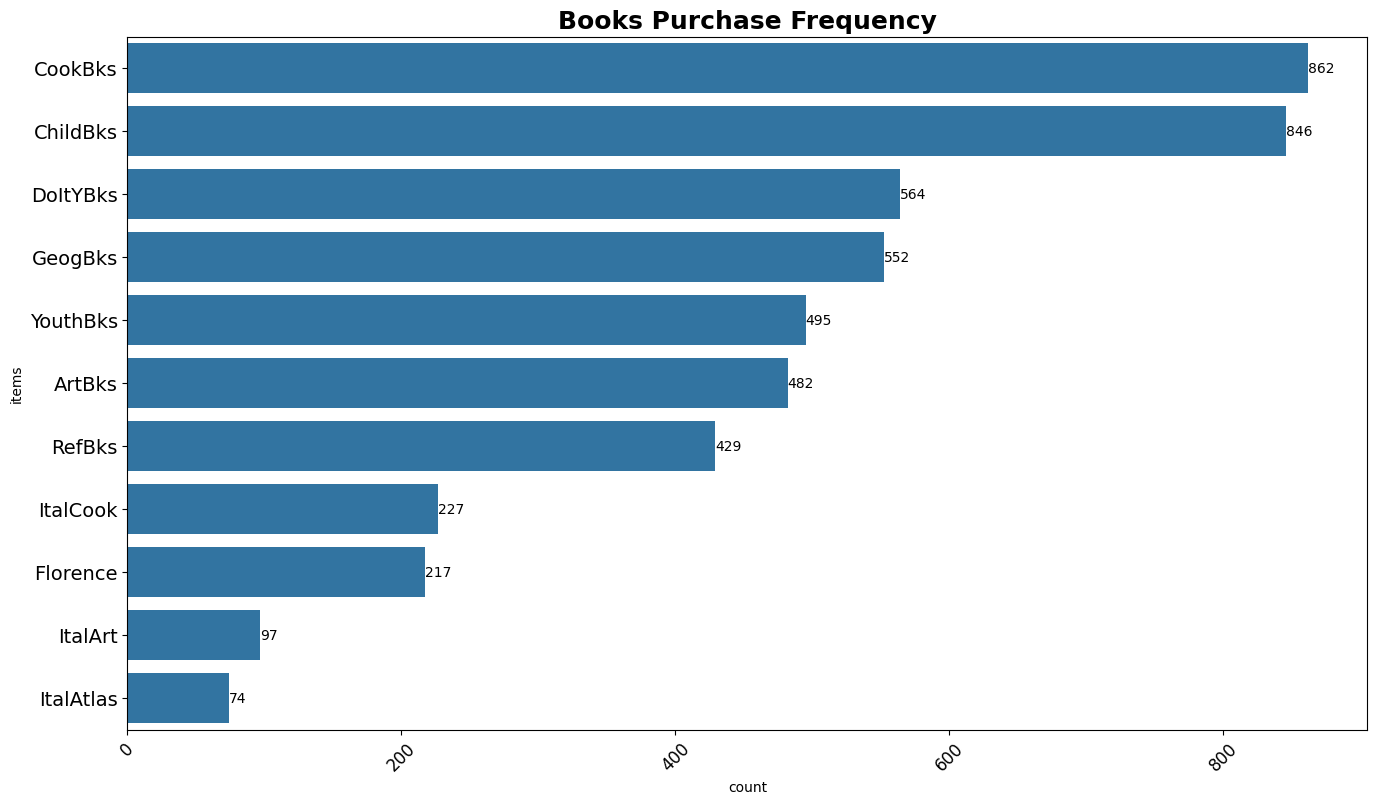

In [12]:
#Bar Plot for diff books
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [13]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=3fc0bbfd739b0822f0e4e294bc81d32d1f6343d9b0a87ab14b6c184591654b35
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [14]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [15]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [16]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

In [17]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum()
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks)",0.2560,2
"(ChildBks, GeogBks)",0.1950,2
"(CookBks, GeogBks)",0.1925,2
"(CookBks, DoItYBks)",0.1875,2
"(ChildBks, DoItYBks)",0.1840,2
"(CookBks, ArtBks)",0.1670,2
"(ChildBks, YouthBks)",0.1650,2
"(ChildBks, ArtBks)",0.1625,2
"(CookBks, YouthBks)",0.1620,2


In [18]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations

In [19]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum()
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(CookBks, ChildBks, GeogBks)",0.1495,3
"(CookBks, ChildBks, DoItYBks)",0.1460,3
"(CookBks, ChildBks, YouthBks)",0.1290,3
"(CookBks, ChildBks, ArtBks)",0.1265,3
"(CookBks, ChildBks, RefBks)",0.1225,3
"(CookBks, DoItYBks, GeogBks)",0.1085,3
"(ChildBks, DoItYBks, GeogBks)",0.1045,3
"(CookBks, GeogBks, ArtBks)",0.1035,3
"(ChildBks, GeogBks, ArtBks)",0.1020,3


In [20]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'Florence'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalAtlas'],
 ['CookBks', 'ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'GeogBks', 'ArtBks']]

In [21]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum()
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


,Support,length
index,,


In [22]:
# ---Association rules with 10% Support and 30% confidence--------------------------------------
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [23]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
85,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
87,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [24]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
71,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
75,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [25]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
85,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
87,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


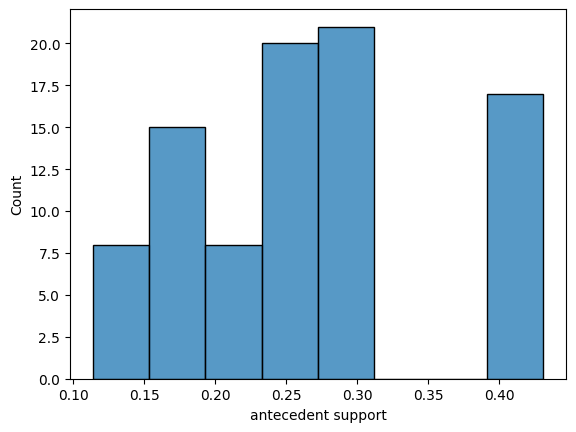

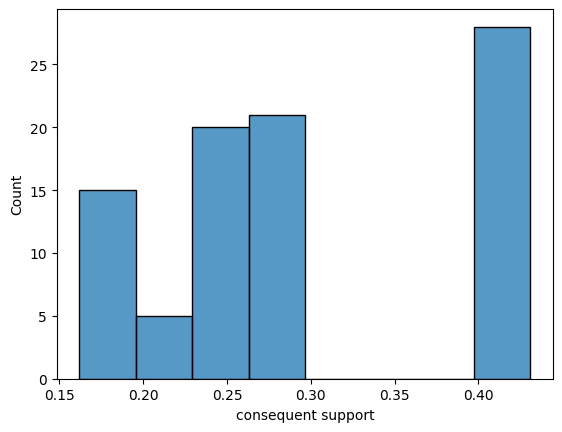

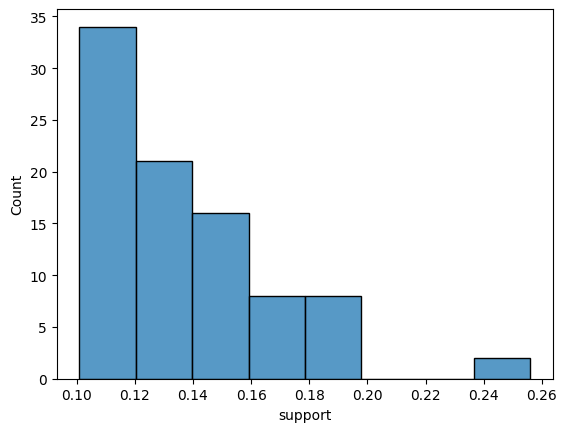

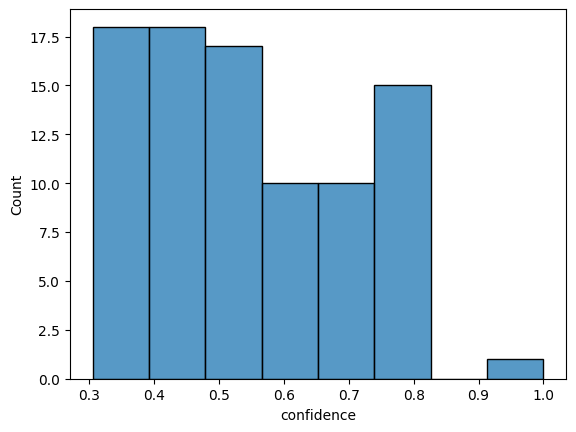

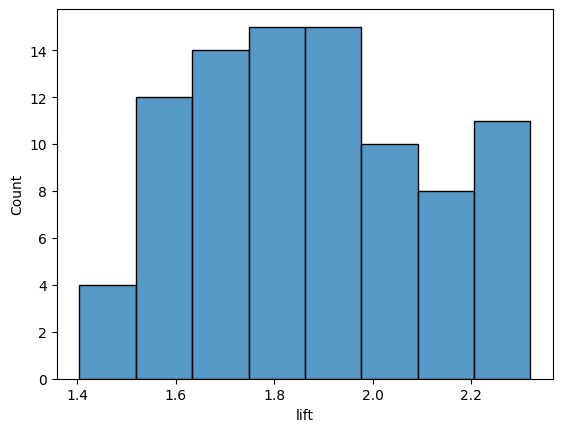

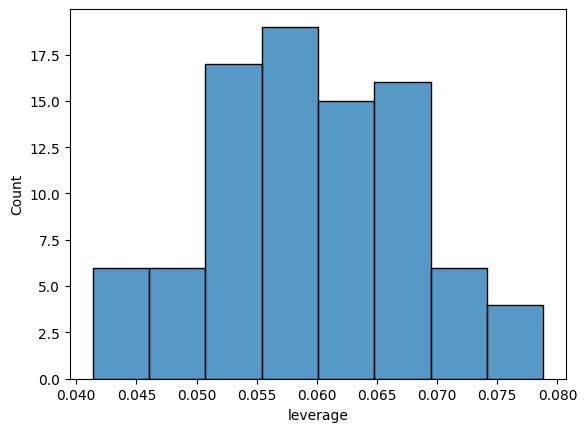

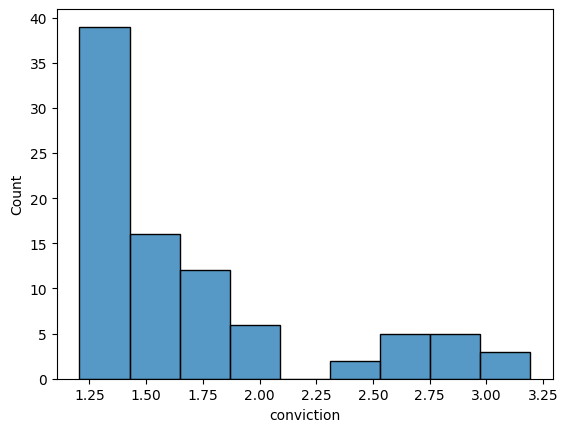

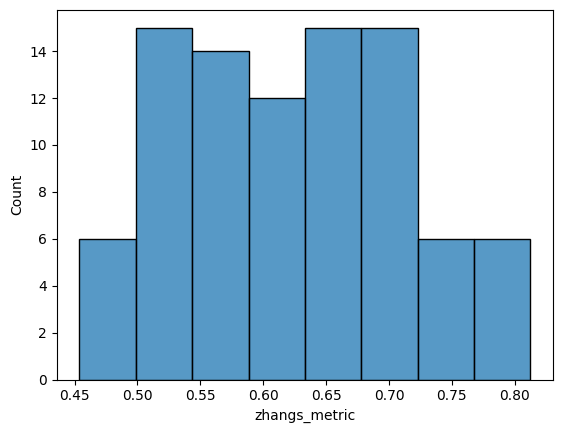

In [26]:
#constructiing the histogram plot for all X variables based on type
import seaborn as sns
#Histogram for each feature with type
for column in lift.select_dtypes(include=["float64"]):
    sns.histplot(x=lift[column])# hue=df['type'])
    plt.show()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

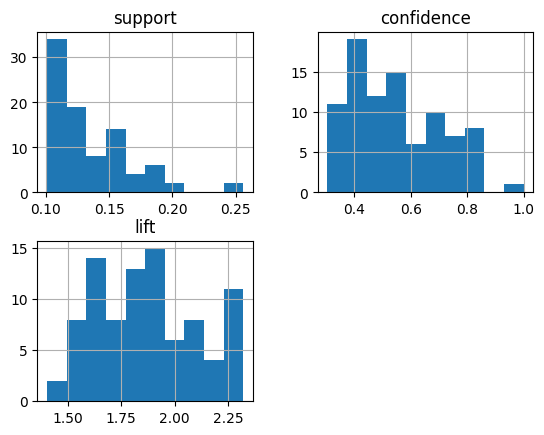

In [ ]:
#Histogram for Support Lift and Confidence
lift[['support','confidence','lift']].hist()

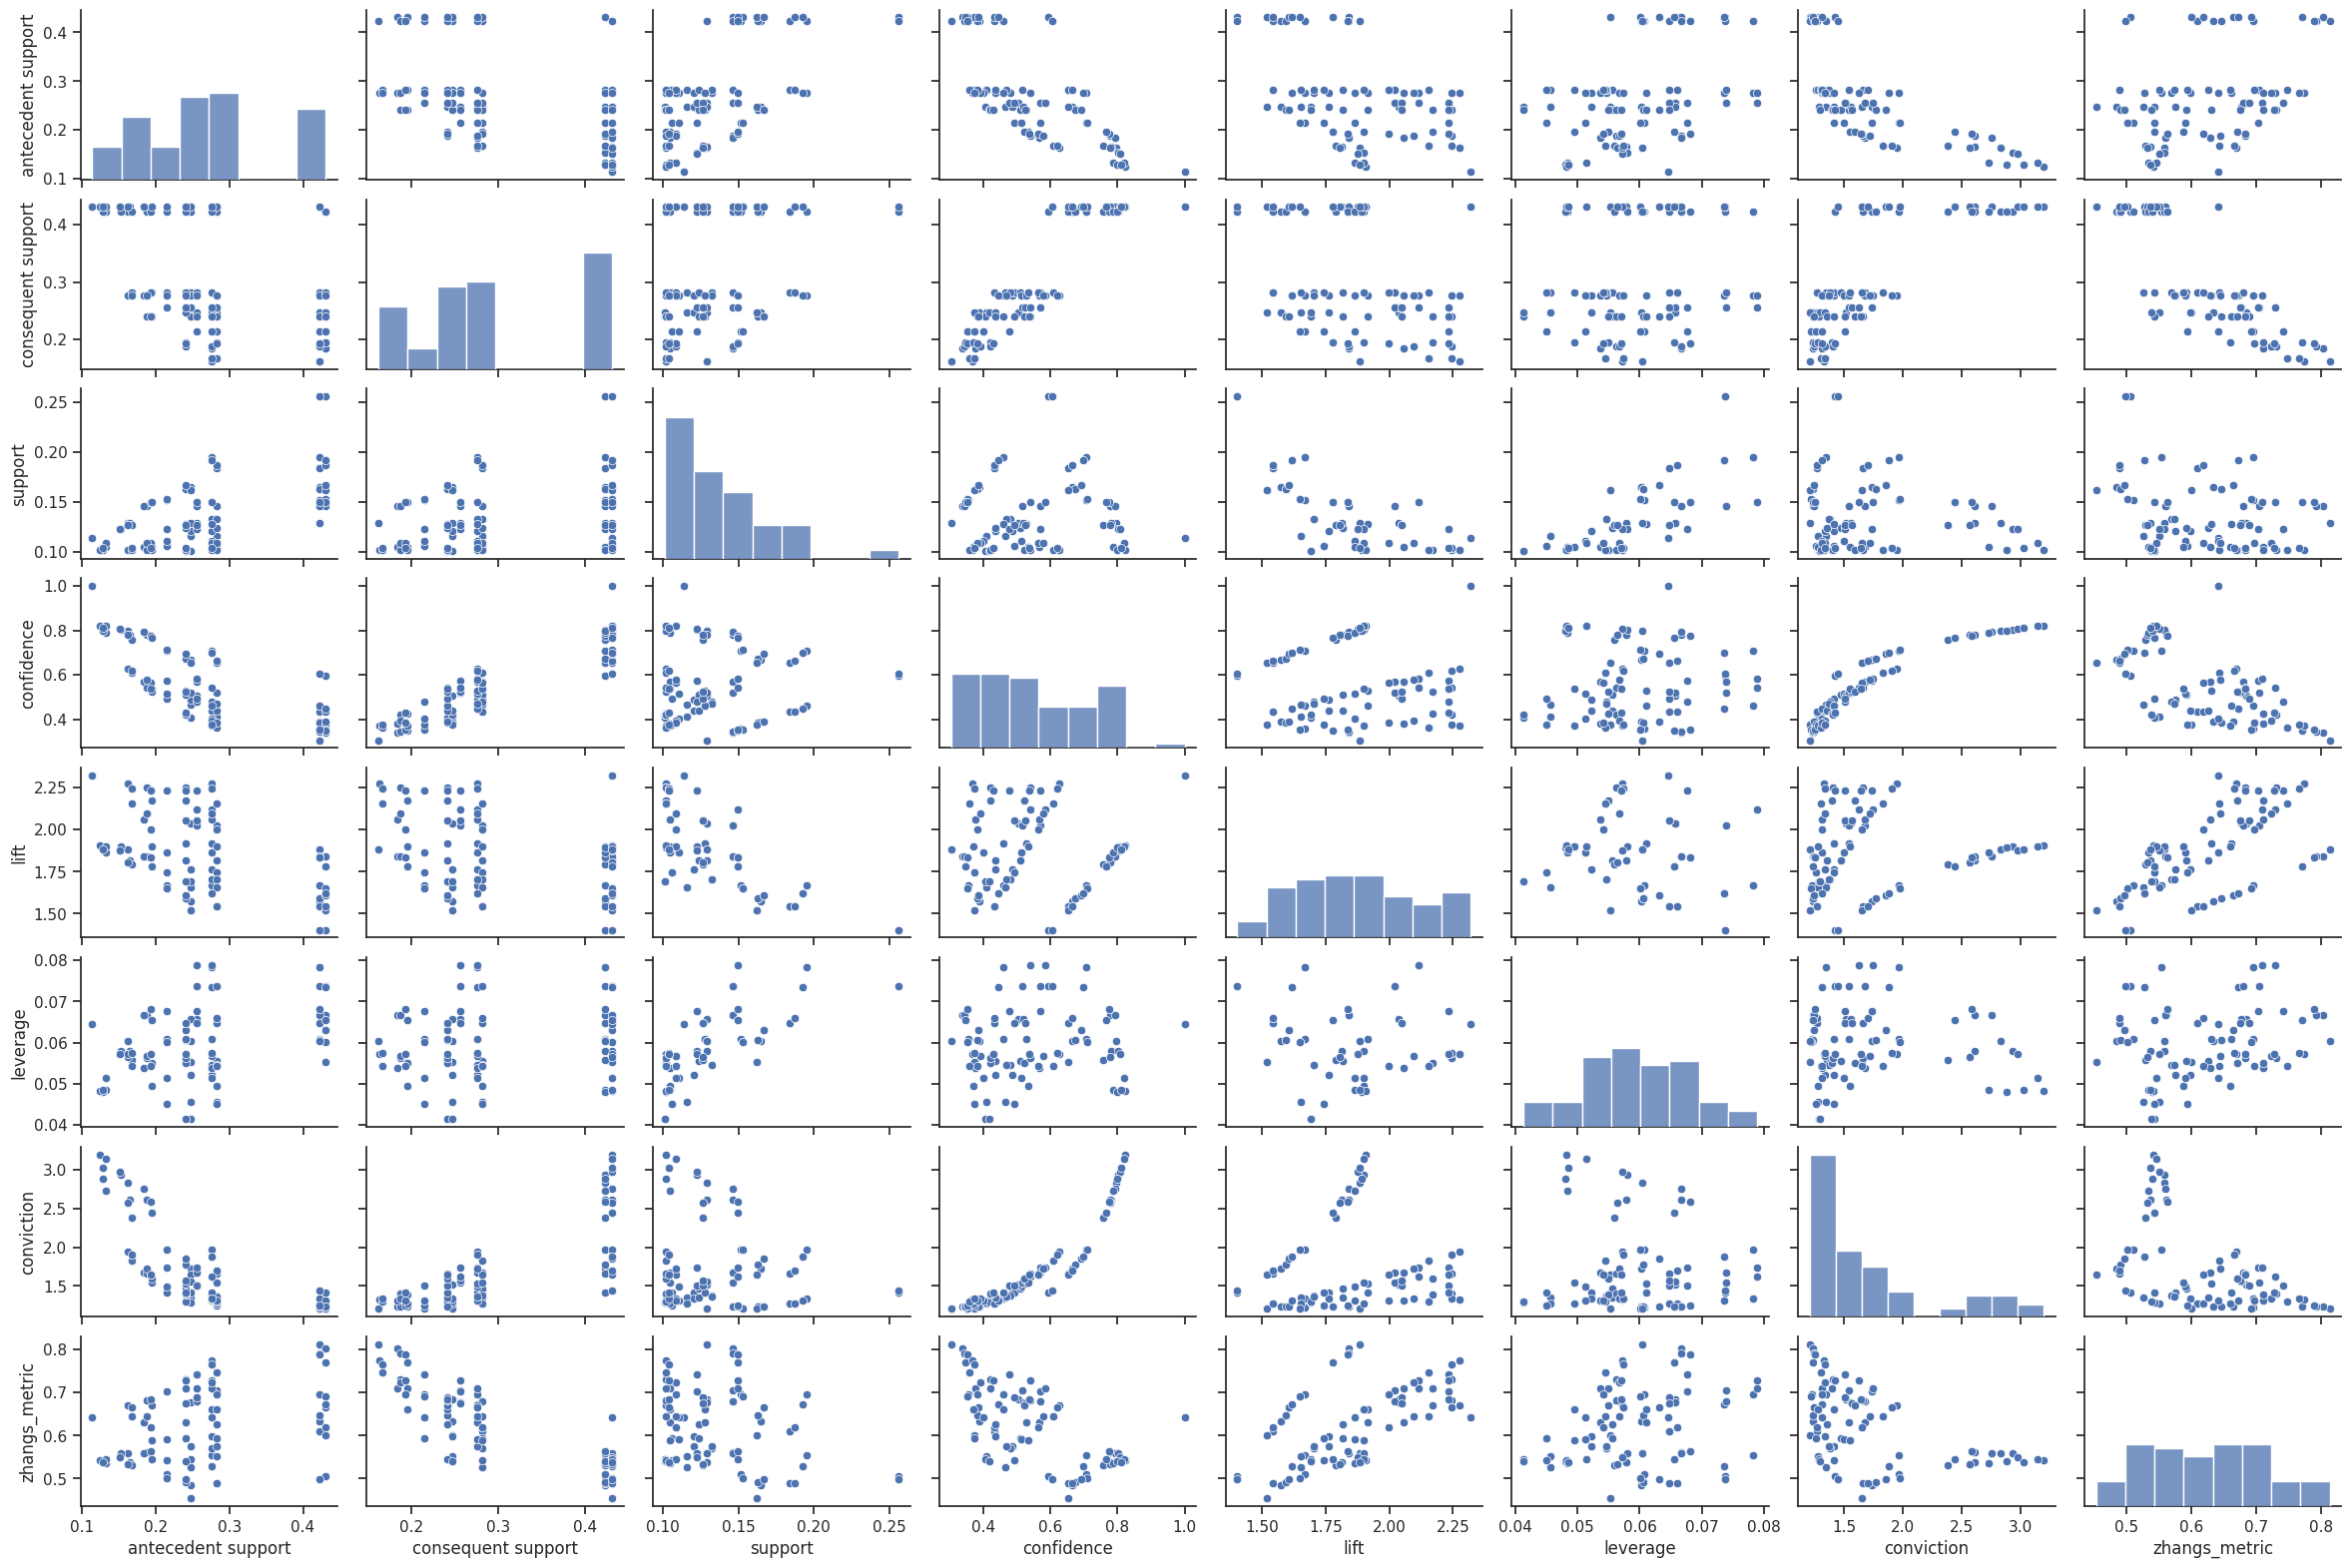

In [27]:
#scatterplot
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(lift,height=2,aspect=1.5)

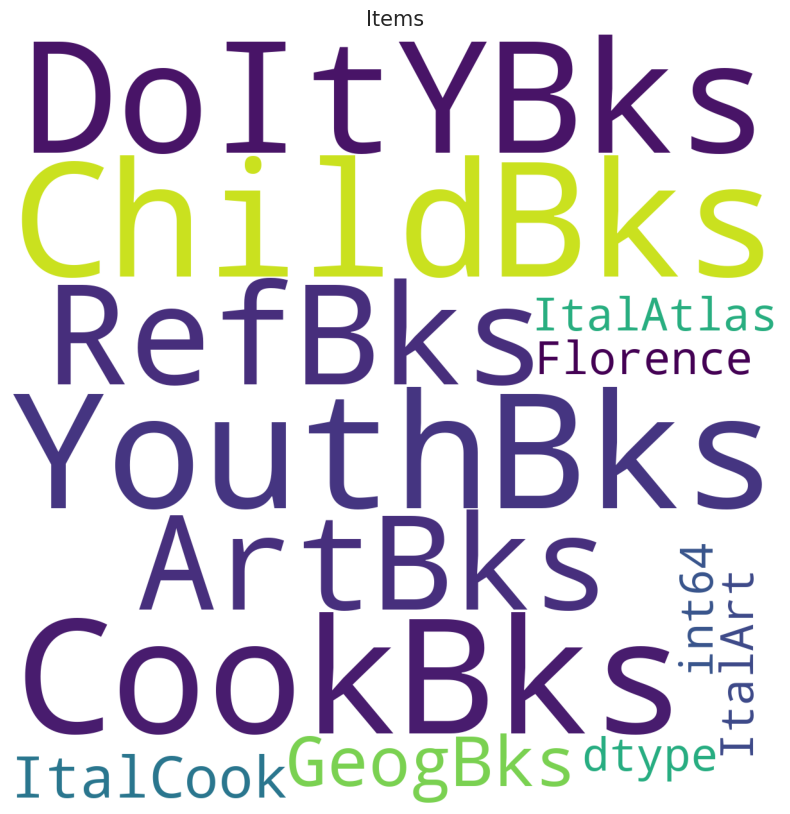

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 15)
plt.show()

In [30]:
#------------------------Association rules with 15% Support and 40% confidence---------------------------------------

In [31]:
frequent_itemsets=apriori(df,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(ChildBks, DoItYBks)",2


In [32]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
